<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-11324-1659290169/blob/main/ibm_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [ ]:
df.shape

(270, 14)

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
format(len(df[df.duplicated()]))

'0'

In [ ]:
name = df.columns
num_var = ['Age', 'BP', 'Cholesterol', 'Max HR', 'Heart Disease']
cat_var = [item for item in name if item not in num_var]

num_var_data = df[df.columns & num_var]
num_var_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """


,Age,BP,Cholesterol,Max HR
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778
std,9.109067,17.861608,51.686237,23.165717
min,29.000000,94.000000,126.000000,71.000000
25%,48.000000,120.000000,213.000000,133.000000
50%,55.000000,130.000000,245.000000,153.500000
75%,61.000000,140.000000,280.000000,166.000000
max,77.000000,200.000000,564.000000,202.000000


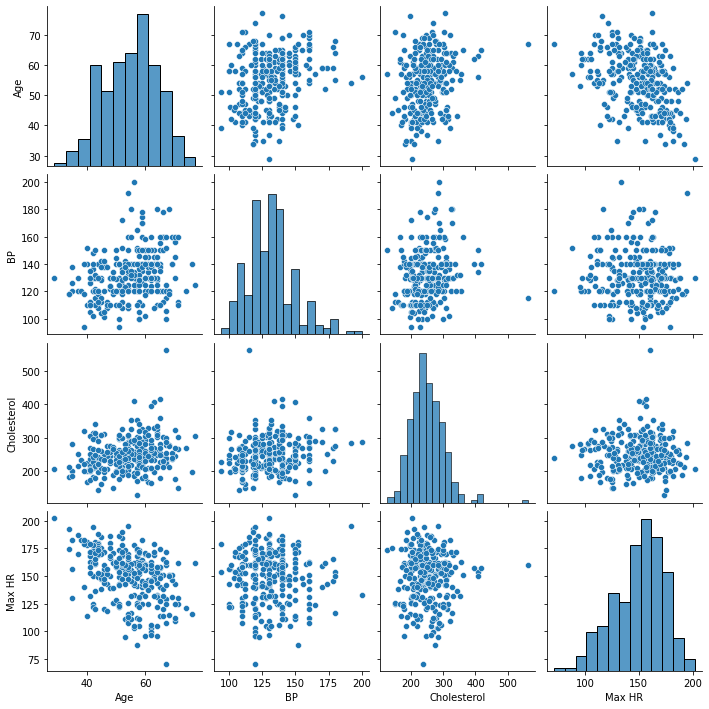

In [ ]:
sns.pairplot(num_var_data)

#heat map eda

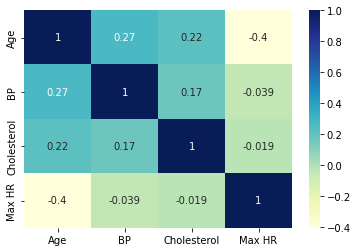

In [ ]:
sns.heatmap(num_var_data.corr(), cmap="YlGnBu", annot=True)

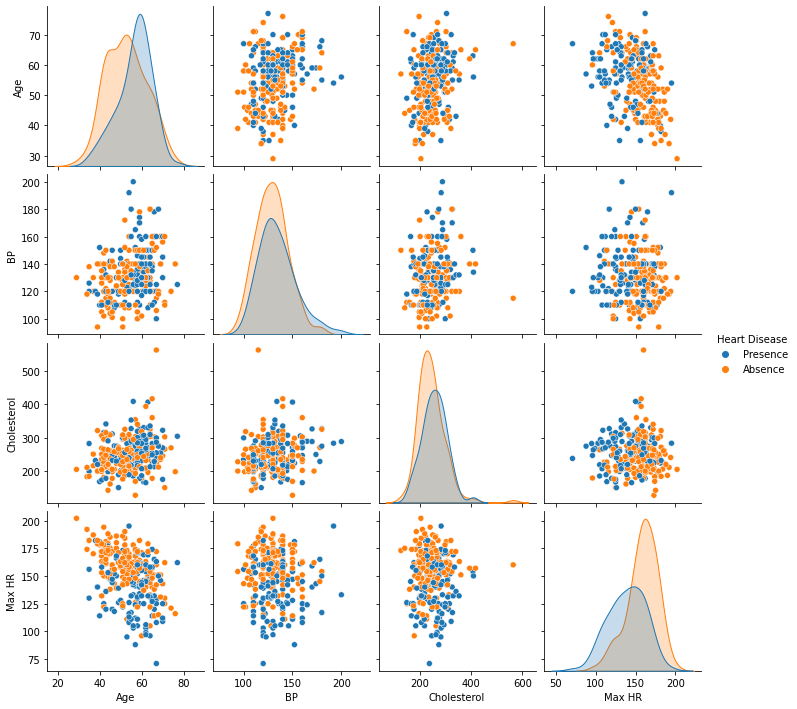

In [ ]:
sns.pairplot(num_var_data, hue = 'Heart Disease')

target followed by model train nd test 

In [ ]:
x = df.drop(['Heart Disease'], axis = 1) 
y = df['Heart Disease']                   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = LogisticRegression()
model.fit(X_train, y_train)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.preprocessing import LabelEncoder
x_train_enc = X_train

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)

In [ ]:
num_var_data[num_var_data['Cholesterol'] > 500]

,Age,BP,Cholesterol,Max HR,Heart Disease
1,67,115,564,160,Absence


In [ ]:
from sklearn.preprocessing import LabelEncoder
x_train_enc = X_train

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)


from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.model_selection import cross_val_score

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(x_train_enc, y_train_enc)

results = permutation_importance(model, x_train_enc, y_train_enc, scoring='neg_mean_squared_error')

importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
from sklearn.inspection import permutation_importance

### perform permutation importance
model.fit(x_train_enc, y_train_enc)

results = permutation_importance(model, x_train_enc, y_train_enc, scoring='neg_mean_squared_error')

#### get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    

Feature: 0, Score: 0.02593
Feature: 1, Score: 0.01019
Feature: 2, Score: 0.03148
Feature: 3, Score: 0.01944
Feature: 4, Score: 0.00463
Feature: 5, Score: 0.00093
Feature: 6, Score: 0.00463
Feature: 7, Score: 0.05463
Feature: 8, Score: 0.00185
Feature: 9, Score: 0.01204
Feature: 10, Score: 0.00556
Feature: 11, Score: 0.07222
Feature: 12, Score: 0.07130


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


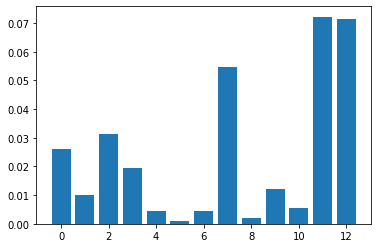

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
selected_feature = ['Sex','Max HR', 'Number of vessels fluro', 'Thallium']
print(selected_feature)

['Sex', 'Max HR', 'Number of vessels fluro', 'Thallium']


In [ ]:
data = df[df.columns & selected_feature]

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33)
model = LogisticRegression()
model.fit(X_train, y_train)
r_sq = model.score(data, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8185185185185185


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
models = []
models.append(('desi', DecisionTreeClassifier()))
models.append(('gussi', GaussianNB()))
models.append(('Svm', SVC()))

In [ ]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, data, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

desi: 0.681481 (0.074444)
gussi: 0.788889 (0.062085)
Svm: 0.696296 (0.054433)


#Box plot

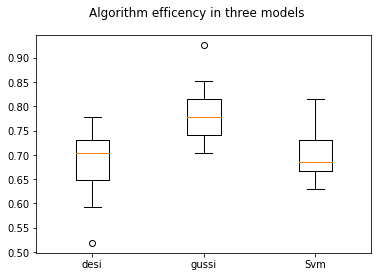

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm efficency in three models ')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()